# author - Bhukar Rohan
# CS 4710

## Note :- Toy_graph is attached in this notebook, cell = 17

## Part1. Finding triangles in a graph.
### A triangle of size 3 in an undirected graph is a set of 3 nodes that are pairwise adjacent. For instance, the nodes a, b,
### and c form a triangle if the following 3 edges are present in the graph: ab, bc, and ac.
### Find all triangles of the graph G

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from itertools import combinations
import itertools

In [70]:
def get_links(data):
    l = []
    for v in data:
        for x in data[v]:
            l.append((v, x))
    return l

In [71]:
def get_base(row: int):
    # method to make base mat for calculation
    x = [ [ 0 for r in range(0,row) ] for c in range(0, row) ]
    return x

In [11]:
def get_triangles(mat, value: int, seq: int):
    row = value
    x = get_base(value)
    y = get_base(value)
    i = 0
    while i < row:
        j = 0
        while j < row: 
            x[i][j] = 0
            for k in range(0, row): 
                x[i][j] = x[i][j] + mat[i][k] * mat[k][j]
            j += 1
        i += 1
   
    i = 0
    while i < row: 
        j = 0
        while j < row: 
            y[i][j] = 0
            for k in range(0, row): 
                y[i][j] = y[i][j] + mat[i][k] * x[k][j]
            j += 1
        i += 1
    
    num,i = 0,0
    while i < row: 
        num += y[i][i]
        i += 1
    result = num // 6  
    print(f"The Number of triangles in this graph component {seq} are : ",result)


In [12]:
def print_tri(x):
    r = []
    for i in list(x.keys()):
        j = x[i]
        v = [tuple(map(str, comb)) for comb in combinations(j, 2)]
        for k in v:
            if i in x[k[0]] and i in x[k[1]] and k[0] in x[k[1]] and set([i,k[0],k[1]]) not in r:
                print(f"Triangle with nodes: {i} {k[0]} {k[1]}")
                r.append(set([i,k[0],k[1]]))

In [13]:
def find_triangles(graph, toy_graph: bool, ppi: bool):
    seq = 0
    if toy_graph:
        G = nx.Graph()
        G.add_nodes_from(list(graph.keys()))
        G.add_edges_from(get_links(dict((k, graph[k]) for k in list(graph.keys()))))
        print("2 disconnected components of graph are :")
        nx.draw(G, with_labels=True, font_weight='bold')
        plt.show()
        f = list(nx.connected_components(G))
        print('---------------------------------------------------------------------------------------------------')
        for component in f:
            G1 = nx.Graph()
            G1.add_nodes_from(component)
            G1.add_edges_from(get_links(dict((k, graph[k]) for k in component)))
            nx.draw(G1, with_labels=True, font_weight='bold')
            plt.show()
            mat=nx.adjacency_matrix(G1)
            dmat=mat.todense()
            ndmat = np.squeeze(np.asarray(dmat))
            row = len(ndmat)
            seq += 1
            get_triangles(ndmat,len(ndmat),seq)
            dat = dict((k, graph[k]) for k in component)
            print_tri(dat)
    elif not ppi:
        mat=nx.adjacency_matrix(graph)
        dmat=mat.todense()
        ndmat = np.squeeze(np.asarray(dmat))
        row = len(ndmat)
        seq += 1
        get_triangles(ndmat,len(ndmat), seq)
    else:
        G = nx.Graph()
        G.add_nodes_from(list(graph.keys()))
        G.add_edges_from(get_links(dict((k, graph[k]) for k in list(graph.keys()))))
        f = list(nx.connected_components(G))
        for component in f:
            if len(component) > 2:
                G1 = nx.Graph()
                G1.add_nodes_from(component)
                G1.add_edges_from(get_links(dict((k, graph[k]) for k in component)))
                t = nx.triangles(G1)
                z = sum(t.values())
                seq += 1
                print(f"The Number of triangles in this graph component {seq} are : ",z)
        

In [17]:
toy_graph = { "1" : ['3','4','5'],
          "2" : ['3','4','5','6'],
          "3" : ['2','1','4','6'],
          "4" : ['2','3','1','5','6'],
          "5" : ['2','4','1','6'],
          "6" : ['2','3','4','5'],
          "7" : ['8','9','10'],
          "8" : ['9','10','7'],
          "9" : ['7','8','10'],
          "10" : ['7','8','9']
        }

2 disconnected components of graph are :


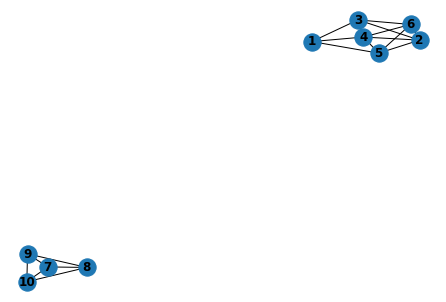

---------------------------------------------------------------------------------------------------


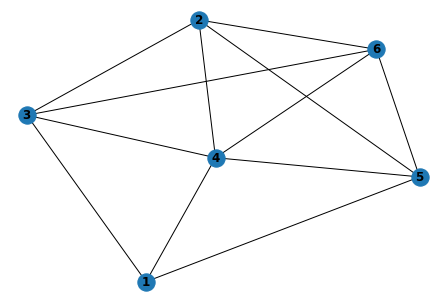

The Number of triangles in this graph component 1 are :  9
Triangle with nodes: 5 2 4
Triangle with nodes: 5 2 6
Triangle with nodes: 5 4 1
Triangle with nodes: 5 4 6
Triangle with nodes: 1 3 4
Triangle with nodes: 3 2 4
Triangle with nodes: 3 2 6
Triangle with nodes: 3 4 6
Triangle with nodes: 2 4 6


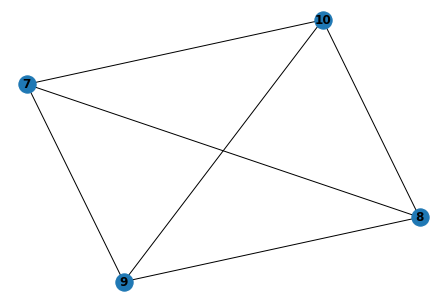

The Number of triangles in this graph component 2 are :  4
Triangle with nodes: 9 7 8
Triangle with nodes: 9 7 10
Triangle with nodes: 9 8 10
Triangle with nodes: 10 7 8


In [41]:
# with toy graph as input, results are :
find_triangles(toy_graph, True, False)

In [80]:
# with 3 random networks as input, results are :
R1 = nx.fast_gnp_random_graph(50, 0.1, seed=None, directed=False)
R2 = nx.fast_gnp_random_graph(50, 0.2, seed=None, directed=False)
R3 = nx.fast_gnp_random_graph(50, 0.8, seed=None, directed=False)

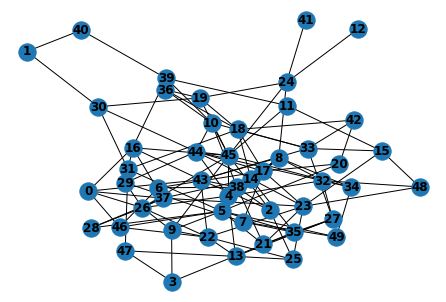

The Number of triangles in this graph component 1 are :  22


In [81]:
nx.draw(R1, with_labels=True, font_weight='bold')
plt.show()
find_triangles(R1, False, False)

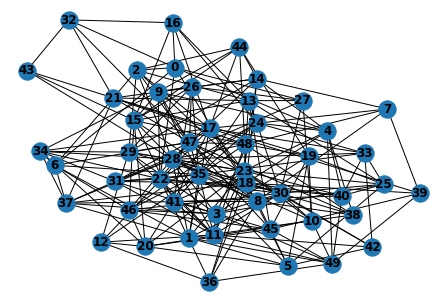

The Number of triangles in this graph component 1 are :  163


In [82]:
nx.draw(R2, with_labels=True, font_weight='bold')
plt.show()
find_triangles(R2, False, False)

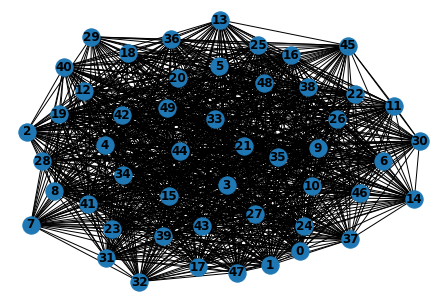

The Number of triangles in this graph component 1 are :  10397


In [83]:
nx.draw(R3, with_labels=True, font_weight='bold')
plt.show()
find_triangles(R3, False, False)

In [134]:
# with ppi as input, results are :
with open('cjejuni-1.sif','r') as fh:
    file = fh.readlines()
p1 = []
p2 = []
p3 = []
for l in file:
    lin = l.rstrip().split(' ')
    p1.append(lin[0])
    p2.append(lin[1])
    p3.append((lin[0],lin[1]))

p1_final = list(set(p1))
p2_final = list(set(p2))
ppi = dict.fromkeys(p1_final+p2_final,[])
for k in ppi:
    for v in p3:
        if k in v:
            ppi[k] = ppi[k] + [x for x in v if x != k]

In [135]:
type(ppi)

dict

In [55]:
# with ppi as input, results are :
find_triangles(ppi, False, True)

The Number of triangles in this graph component 1 are :  1938


### Part 2: Finding cycles of length 4 (quadrangles)
### A cycle is a path in a graph that starts and ends at the same vertex.
### Find all cycles of length 4 of the graph G.

In [164]:
def get_data(data, p, n, r, x, y): 
    global x1
    p[r]=1
    if n==0:  
        p[r] = 0
        if data[r][x] == 1: 
            return y+1 
        else: 
            return y 
    for i in range(0,x1): 
        if p[i]==0 and data[r][i]==1: 
            y = get_data(data,p,n-1,i,x,y) 
    p[r]=0
    return y 

In [165]:
def get_values(data, n): 
    global x1
    p,y,o = [0] * x1,0,n-1 
    for w in range(0,x1-o): 
        y = get_data(data,p,o,w,w,y) 
        p[w] = 1
    res = int(y/2)
    return res

In [166]:
def print_result_part2(ndmat,seq):
    global x1
    x1 = len(ndmat)
    gh = get_values(ndmat,4)
    print(f'cycles of length 4 of the graph G in component {seq} are :', gh)

In [138]:
def get_part2(graph, toy_graph: bool, ppi: bool):
    seq = 0
    if toy_graph:
        G = nx.Graph()
        G.add_nodes_from(list(graph.keys()))
        G.add_edges_from(get_links(dict((k, graph[k]) for k in list(graph.keys()))))
        f = list(nx.connected_components(G))
        for component in f:
            G1 = nx.Graph()
            G1.add_nodes_from(component)
            G1.add_edges_from(get_links(dict((k, graph[k]) for k in component)))
            nx.draw(G1, with_labels=True, font_weight='bold')
            plt.show()
            mat=nx.adjacency_matrix(G1)
            dmat=mat.todense()
            ndmat = np.squeeze(np.asarray(dmat))
            row = len(ndmat)
            seq += 1
            global V
            V = len(ndmat)
            gh = get_values(ndmat,4)
            print(f'cycles of length 4 of the graph G in component {seq} are :', gh)
    elif not ppi:
        mat=nx.adjacency_matrix(graph)
        dmat=mat.todense()
        ndmat = np.squeeze(np.asarray(dmat))
        row = len(ndmat)
        seq += 1
        print_result_part2(ndmat, seq)
    else:
        G = nx.Graph()
        G.add_nodes_from(list(graph.keys()))
        G.add_edges_from(get_links(dict((k, graph[k]) for k in list(graph.keys()))))
        f = list(nx.connected_components(G))
        for component in f:
            if len(component) > 2:
                G1 = nx.Graph()
                G1.add_nodes_from(component)
                G1.add_edges_from(get_links(dict((k, graph[k]) for k in component)))
                mat=nx.adjacency_matrix(G1)
                dmat=mat.todense()
                ndmat = np.squeeze(np.asarray(dmat))
                row = len(ndmat)
                seq += 1
                print_result_part2(ndmat, seq)
            
                

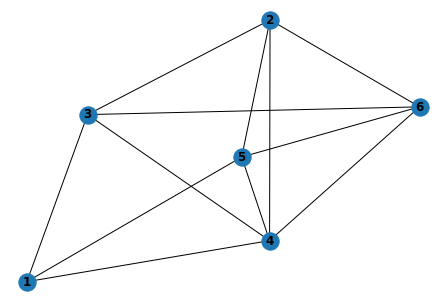

cycles of length 4 of the graph G in component 1 are : 16


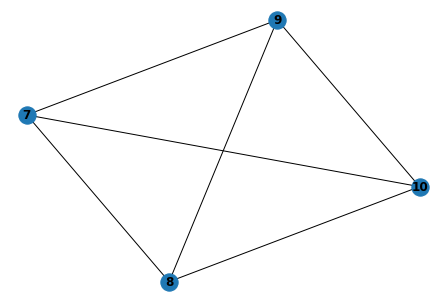

cycles of length 4 of the graph G in component 2 are : 3


In [101]:
# with toy graph as input, results are :
get_part2(toy_graph,True,False)

In [118]:
# with 3 random networks as input, results are :
R1 = nx.fast_gnp_random_graph(50, 0.1, seed=None, directed=False)
R2 = nx.fast_gnp_random_graph(50, 0.2, seed=None, directed=False)
R3 = nx.fast_gnp_random_graph(50, 0.8, seed=None, directed=False)

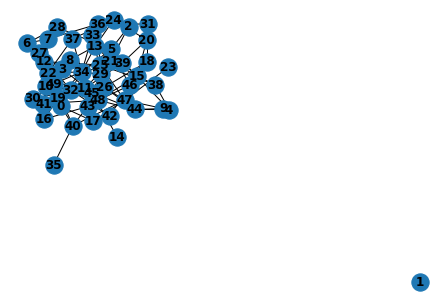

cycles of length 4 of the graph G in component 1 are : 43


In [120]:
nx.draw(R1, with_labels=True, font_weight='bold')
plt.show()
get_part2(R1,False,False)

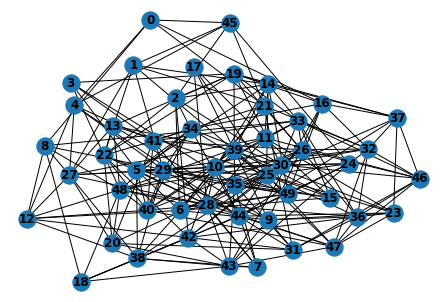

cycles of length 4 of the graph G in component 1 are : 975


In [121]:
nx.draw(R2, with_labels=True, font_weight='bold')
plt.show()
get_part2(R2,False,False)

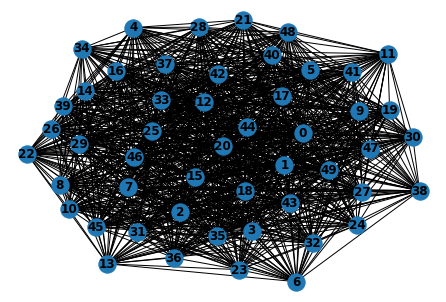

cycles of length 4 of the graph G in component 1 are : 257635


In [122]:
nx.draw(R3, with_labels=True, font_weight='bold')
plt.show()
get_part2(R3,False,False)

In [139]:
# with ppi as input, results are :
get_part2(ppi,False,True)

cycles of length 4 of the graph G in component 1 are : 13756


### Part 3: Finding cliques of size 4
### A clique of size k or a k-clique is a complete subgraph of size k.
### Find all cliques of size 4 of the graph G.

In [383]:
def get_subgraphs(data, size: int):
    num = size/2
    d = size*size
    var = [set([x,y]) for x,y in data.edges() if x != y]
    while var:
        if num == size:
            yield num, var
        z,q = set(),dict()
        for p,r in itertools.combinations(var,int(size/2)):
            q[num] = r
            q[d] = [p,r]
            if len(p^r)==int(size/2) and data.has_edge(*(p^r)):
                z.add(tuple(p|r))
            else:
                q[num],q[d] = 0,p
        q[d] = 1
        var = list(map(set,z))
        d = d-1
        num = num+1
    return 

In [384]:
def get_results(data, val, b: bool):
    c = (val*val)/2
    w = []
    i = 0
    for x,y in get_subgraphs(data,val):
        nm = [c,x,y]
        w = []
        for v in y:
            if v not in w:
                w.append(v)
                i+=1
        if w and b:
            [print('Cliques of size 4 of graph G are :',v) for v in w][0]
            
    if not w:
        print('No cliques of size 4 found')
    else:
        print('Total number of cliques of size 4 are:',i)
    return

In [385]:
def get_part3(graph, toy_graph: bool, ppi: bool):
    seq = 0
    if toy_graph:
        G = nx.Graph()
        G.add_nodes_from(list(graph.keys()))
        G.add_edges_from(get_links(dict((k, graph[k]) for k in list(graph.keys()))))
        f = list(nx.connected_components(G))
        for component in f:
            G1 = nx.Graph()
            G1.add_nodes_from(component)
            G1.add_edges_from(get_links(dict((k, graph[k]) for k in component)))
            nx.draw(G1, with_labels=True, font_weight='bold')
            plt.show()
            get_results(G1, 4, True)
    elif not ppi:
        get_results(graph, 4, False)
    else:
        G = nx.Graph()
        G.add_nodes_from(list(graph.keys()))
        G.add_edges_from(get_links(dict((k, graph[k]) for k in list(graph.keys()))))
        f = list(nx.connected_components(G))
        for component in f:
            if len(component) > 2:
                G1 = nx.Graph()
                G1.add_nodes_from(component)
                G1.add_edges_from(get_links(dict((k, graph[k]) for k in component)))
                get_results(G1, 4, False)
            
                

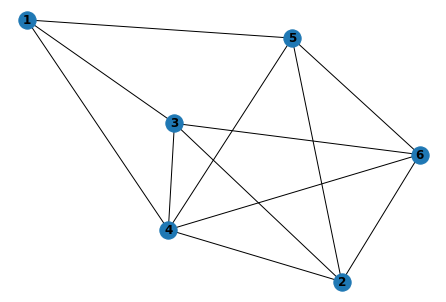

Cliques of size 4 of graph G are : {'5', '4', '6', '2'}
Cliques of size 4 of graph G are : {'4', '3', '6', '2'}
Total number of cliques of size 4 are: 2


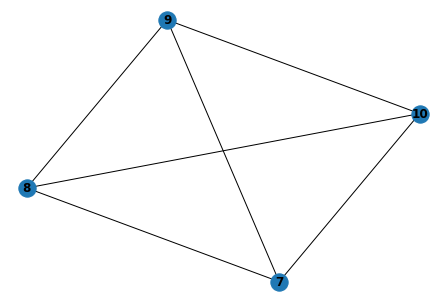

Cliques of size 4 of graph G are : {'10', '9', '8', '7'}
Total number of cliques of size 4 are: 1


In [386]:
# with toy graph as input, results are :
get_part3(toy_graph,True,False)

In [387]:
# with 3 random networks as input, results are :
R1 = nx.fast_gnp_random_graph(50, 0.1, seed=None, directed=False)
R2 = nx.fast_gnp_random_graph(50, 0.2, seed=None, directed=False)
R3 = nx.fast_gnp_random_graph(50, 0.8, seed=None, directed=False)

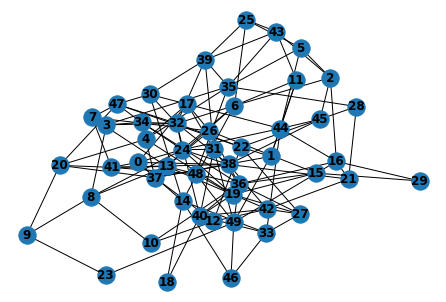

No cliques of size 4 found


In [388]:
nx.draw(R1, with_labels=True, font_weight='bold')
plt.show()
get_part3(R1,False,False)

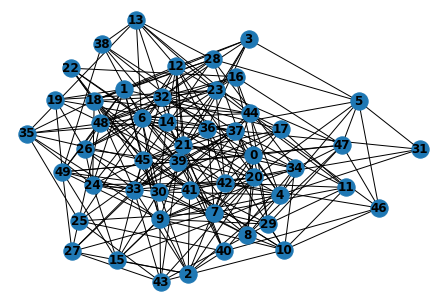

Total number of cliques of size 4 are: 18


In [389]:
nx.draw(R2, with_labels=True, font_weight='bold')
plt.show()
get_part3(R2,False,False)

In [ ]:
nx.draw(R3, with_labels=True, font_weight='bold')
plt.show()
get_part3(R3,False,False)

In [167]:
## my system ran out of memory for R3 and ppi for clique part3 question

In [ ]:
# with ppi as input, results are :
get_part3(ppi,False,True)

### Part 4. Connectivity
### Check whether for any pair (u, v) of nodes of G:
### a) there is no path (the two nodes are disconnected)
### c) there are at least 2 shortest paths

In [137]:
def get_disconnected_nodes(values, data, b: bool):
    e = []
    print('disconnected nodes for graph G are :')
    for x in values:
        v = [r for p, r in data.edges(x)]
        res = [t for t in values if t not in v+[x]]
        if res:
            for n in res:
                if set([x,n]) not in e:
                    if b:
                        print((x,n))
                    print((x,n))
                    e.append(set([x,n]))
    print('total number of disconnected nodes are:',len(e))
    return

In [138]:
def get_path(data, x, y):
    num,w = (x,y),[(x, [x])]
    flag = False
    while w:
        (p,r) = w.pop(0)
        for next in data[p]-set(r):
            if next != y:
                w.append(tuple([next,r+[next]]))
                if len(w)>=2 and len(w[0][1]) == len(w[1][1]):
                    flag = True
                    break
                #
            else:
                yield r+[next]
        if flag:
            break
    yield x,y

In [139]:
def get_short_path(data, b: bool, G):
    nodes = list(data.keys())
    num = 0
    for i,j in enumerate(nodes):
        for x in nodes[i+1:]:
            if j in list(G.nodes) and x in list(G.nodes) and (j,x) not in list(G.edges(j)):
                result = list(get_path(data, j, x))[0]
                if isinstance(result,tuple):
                    if b:
                        print(f"nodes with atleast 2 shortest paths between them are : {(result[0],result[1])}")
                    elif not b:
                        num += 1
    if not b:
        print("the number of pairs of nodes for which there are at least two shortest paths between them in G are:",num)   
    return

In [140]:
def get_part4a(graph, toy_graph: bool, ppi: bool):
    seq = 0
    if toy_graph:
        G = nx.Graph()
        G.add_nodes_from(list(graph.keys()))
        G.add_edges_from(get_links(dict((k, graph[k]) for k in list(graph.keys()))))
        f = list(nx.connected_components(G))
        for component in f:
            G1 = nx.Graph()
            G1.add_nodes_from(component)
            G1.add_edges_from(get_links(dict((k, graph[k]) for k in component)))
            nx.draw(G1, with_labels=True, font_weight='bold')
            plt.show()
            get_disconnected_nodes(list(graph.keys()),G, True)
    elif not ppi:
        #get_results(graph, 4, False)
        get_disconnected_nodes(list(graph.nodes),graph, False)
    else:
        G = nx.Graph()
        G.add_nodes_from(list(graph.keys()))
        G.add_edges_from(get_links(dict((k, graph[k]) for k in list(graph.keys()))))
        get_disconnected_nodes(list(G.nodes),G, False)
            
                

In [157]:
def get_part4b(graph, toy_graph: bool, ppi: bool):
    seq = 0
    if toy_graph:
        G = nx.Graph()
        G.add_nodes_from(list(graph.keys()))
        G.add_edges_from(get_links(dict((k, graph[k]) for k in list(graph.keys()))))
        f = list(nx.connected_components(G))
        for component in f:
            G1 = nx.Graph()
            G1.add_nodes_from(component)
            G1.add_edges_from(get_links(dict((k, graph[k]) for k in component)))
            nx.draw(G1, with_labels=True, font_weight='bold')
            plt.show()
            graph2 = dict((k, set(graph[k])) for k in list(graph.keys()))
            get_short_path(graph2,True, G1)
    elif not ppi:
        res = dict.fromkeys(list(graph.nodes))
        for n in list(graph.nodes):
            e = list(graph.edges(n))
            c = set([i[0] if i[0]!=n else i[1] for i in e])
            res[n] = c
        get_short_path(res,False,graph)
    else:
        G = nx.Graph()
        G.add_nodes_from(list(graph.keys()))
        G.add_edges_from(get_links(dict((k, graph[k]) for k in list(graph.keys()))))
        f = list(nx.connected_components(G))
        for component in f:
            if len(component) > 2:
                G1 = nx.Graph()
                G1.add_nodes_from(component)
                G1.add_edges_from(get_links(dict((k, graph[k]) for k in component)))
                res = dict.fromkeys(list(G1.nodes))
                for n in list(G1.nodes):
                    e = list(G1.edges(n))
                    c = set([i[0] if i[0]!=n else i[1] for i in e])
                    res[n] = c
                get_short_path(res,False,G1)
            
                

## part 4a

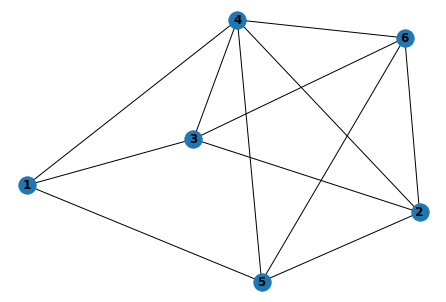

disconnected nodes for graph G are :
('1', '2')
('1', '6')
('1', '7')
('1', '8')
('1', '9')
('1', '10')
('2', '7')
('2', '8')
('2', '9')
('2', '10')
('3', '5')
('3', '7')
('3', '8')
('3', '9')
('3', '10')
('4', '7')
('4', '8')
('4', '9')
('4', '10')
('5', '7')
('5', '8')
('5', '9')
('5', '10')
('6', '7')
('6', '8')
('6', '9')
('6', '10')
total number of disconnected nodes are: 27


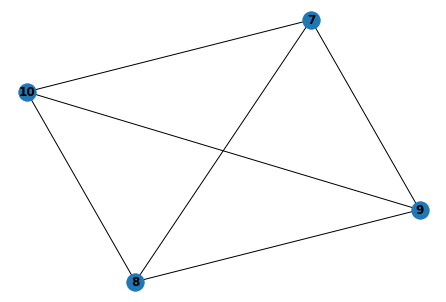

disconnected nodes for graph G are :
('1', '2')
('1', '6')
('1', '7')
('1', '8')
('1', '9')
('1', '10')
('2', '7')
('2', '8')
('2', '9')
('2', '10')
('3', '5')
('3', '7')
('3', '8')
('3', '9')
('3', '10')
('4', '7')
('4', '8')
('4', '9')
('4', '10')
('5', '7')
('5', '8')
('5', '9')
('5', '10')
('6', '7')
('6', '8')
('6', '9')
('6', '10')
total number of disconnected nodes are: 27


In [433]:
# with toy graph as input, results are :
get_part4a(toy_graph,True,False)

In [8]:
# with 3 random networks as input, results are :
R1 = nx.fast_gnp_random_graph(50, 0.1, seed=None, directed=False)
R2 = nx.fast_gnp_random_graph(50, 0.2, seed=None, directed=False)
R3 = nx.fast_gnp_random_graph(50, 0.8, seed=None, directed=False)

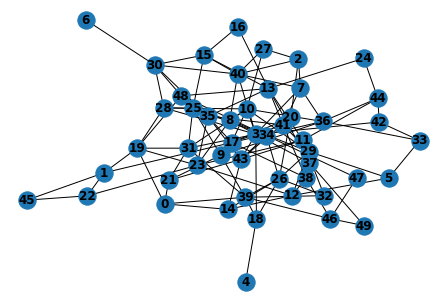

disconnected nodes for graph G are :
total number of disconnected nodes are: 1107


In [435]:
nx.draw(R1, with_labels=True, font_weight='bold')
plt.show()
get_part4a(R1,False,False)

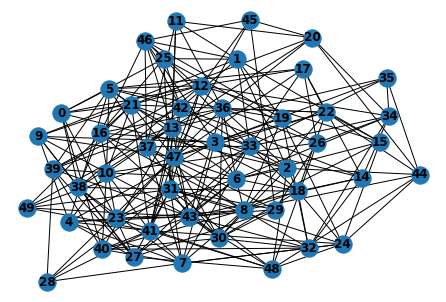

disconnected nodes for graph G are :
total number of disconnected nodes are: 987


In [436]:
nx.draw(R2, with_labels=True, font_weight='bold')
plt.show()
get_part4a(R2,False,False)

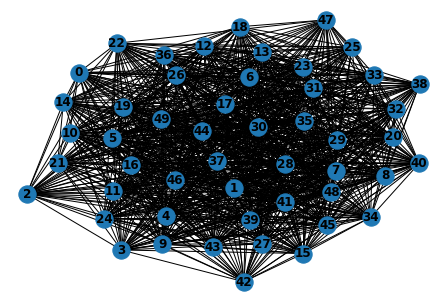

disconnected nodes for graph G are :
total number of disconnected nodes are: 266


In [437]:
nx.draw(R3, with_labels=True, font_weight='bold')
plt.show()
get_part4a(R3,False,False)

In [142]:
# with ppi as input, results are :
get_part4a(ppi,False,True)

disconnected nodes for graph G are :
('Cj0920c', 'Cj1223c')
('Cj0920c', 'Cj0471')
('Cj0920c', 'Cj1480c')
('Cj0920c', 'Cj0312')
('Cj0920c', 'Cj1632c')
('Cj0920c', 'Cj0175c')
('Cj0920c', 'Cj1617')
('Cj0920c', 'Cj1522c')
('Cj0920c', 'Cj0575')
('Cj0920c', 'Cj0535')
('Cj0920c', 'Cj1339c')
('Cj0920c', 'Cj0549')
('Cj0920c', 'Cj0547')
('Cj0920c', 'Cj1634c')
('Cj0920c', 'Cj0012c')
('Cj0920c', 'Cj1648')
('Cj0920c', 'Cj0483')
('Cj0920c', 'Cj0117')
('Cj0920c', 'Cj0909')
('Cj0920c', 'Cj0527c')
('Cj0920c', 'Cj1078')
('Cj0920c', 'Cj1546')
('Cj0920c', 'Cj0918c')
('Cj0920c', 'Cj0699c')
('Cj0920c', 'Cj1186c')
('Cj0920c', 'Cj1258')
('Cj0920c', 'Cj1366c')
('Cj0920c', 'Cj0834c')
('Cj0920c', 'Cj0365c')
('Cj0920c', 'Cj0239c')
('Cj0920c', 'Cj0551')
('Cj0920c', 'Cj1275c')
('Cj0920c', 'Cj1245c')
('Cj0920c', 'Cj0180')
('Cj0920c', 'Cj0543')
('Cj0920c', 'Cj0533')
('Cj0920c', 'Cj1382c')
('Cj0920c', 'Cj1177c')
('Cj0920c', 'Cj1162c')
('Cj0920c', 'Cj1419c')
('Cj0920c', 'Cj0128c')
('Cj0920c', 'Cj0101')
('Cj0920c', 'Cj0

('Cj1223c', 'Cj0320')
('Cj1223c', 'Cj0261c')
('Cj1223c', 'Cj1135')
('Cj1223c', 'Cj0295')
('Cj1223c', 'Cj1216c')
('Cj1223c', 'Cj0974')
('Cj1223c', 'Cj1277c')
('Cj1223c', 'Cj0484')
('Cj1223c', 'Cj0149c')
('Cj1223c', 'Cj0548')
('Cj1223c', 'Cj1279c')
('Cj1223c', 'Cj0701')
('Cj1223c', 'Cj1019c')
('Cj1223c', 'Cj0693c')
('Cj1223c', 'Cj0586')
('Cj1223c', 'Cj0042')
('Cj1223c', 'Cj1434c')
('Cj1223c', 'Cj0793')
('Cj1223c', 'Cj0936')
('Cj1223c', 'Cj0604')
('Cj1223c', 'Cj0025c')
('Cj1223c', 'Cj1420c')
('Cj1223c', 'Cj1027c')
('Cj1223c', 'Cj0605')
('Cj1223c', 'Cj0855')
('Cj1223c', 'Cj0956c')
('Cj1223c', 'Cj0073c')
('Cj1223c', 'Cj1041c')
('Cj1223c', 'Cj0034c')
('Cj1223c', 'Cj0740')
('Cj1223c', 'Cj1182c')
('Cj1223c', 'Cj0167c')
('Cj1223c', 'Cj0789')
('Cj1223c', 'Cj1319')
('Cj1223c', 'Cj1411c')
('Cj1223c', 'Cj1656c')
('Cj1223c', 'Cj1640')
('Cj1223c', 'Cj1058c')
('Cj1223c', 'Cj1104')
('Cj1223c', 'Cj0653c')
('Cj1223c', 'Cj0737')
('Cj1223c', 'Cj1175c')
('Cj1223c', 'Cj1573c')
('Cj1223c', 'Cj0769c')
('Cj1223

('Cj0471', 'Cj0507')
('Cj0471', 'Cj0903c')
('Cj0471', 'Cj1318')
('Cj0471', 'Cj0959c')
('Cj0471', 'Cj0358')
('Cj0471', 'Cj0137')
('Cj0471', 'Cj1343c')
('Cj0471', 'Cj0706')
('Cj0471', 'Cj1493c')
('Cj0471', 'Cj0053c')
('Cj0471', 'Cj0375')
('Cj0471', 'Cj1562')
('Cj0471', 'Cj0337c')
('Cj0471', 'Cj0771c')
('Cj0471', 'Cj1088c')
('Cj0471', 'Cj0361')
('Cj0471', 'Cj0694')
('Cj0471', 'Cj0620')
('Cj0471', 'Cj1064')
('Cj0471', 'Cj1645')
('Cj0471', 'Cj0262c')
('Cj0471', 'Cj0570')
('Cj0471', 'Cj0687c')
('Cj0471', 'Cj1093c')
('Cj0471', 'Cj0362')
('Cj0471', 'Cj0554')
('Cj0471', 'Cj1713')
('Cj0471', 'Cj1090c')
('Cj0471', 'Cj0845c')
('Cj0471', 'Cj1142')
('Cj0471', 'Cj0925')
('Cj0471', 'Cj1348c')
('Cj0471', 'Cj0948c')
('Cj0471', 'Cj0580c')
('Cj0471', 'Cj1299')
('Cj0471', 'Cj0405')
('Cj0471', 'Cj0978c')
('Cj0471', 'Cj0038c')
('Cj0471', 'Cj1578c')
('Cj0471', 'Cj1284')
('Cj0471', 'Cj0134')
('Cj0471', 'Cj1670c')
('Cj0471', 'Cj0714')
('Cj0471', 'Cj1030c')
('Cj0471', 'Cj0971')
('Cj0471', 'Cj0916c')
('Cj0471', '

('Cj1480c', 'Cj1672c')
('Cj1480c', 'Cj0513')
('Cj1480c', 'Cj1311')
('Cj1480c', 'Cj0125c')
('Cj1480c', 'Cj0173c')
('Cj1480c', 'Cj1327')
('Cj1480c', 'Cj1060c')
('Cj1480c', 'Cj0066c')
('Cj1480c', 'Cj1248')
('Cj1480c', 'Cj0032')
('Cj1480c', 'Cj0457c')
('Cj1480c', 'Cj0613')
('Cj1480c', 'Cj1381')
('Cj1480c', 'Cj0185c')
('Cj1480c', 'Cj1113')
('Cj1480c', 'Cj1611')
('Cj1480c', 'Cj0263')
('Cj1480c', 'Cj1043c')
('Cj1480c', 'Cj0360')
('Cj1480c', 'Cj0427')
('Cj1480c', 'Cj0617')
('Cj1480c', 'Cj0095')
('Cj1480c', 'Cj1187c')
('Cj1480c', 'Cj0929')
('Cj1480c', 'Cj1086c')
('Cj1480c', 'Cj0281c')
('Cj1480c', 'Cj0976')
('Cj1480c', 'Cj0029')
('Cj1480c', 'Cj1116c')
('Cj1480c', 'Cj0198c')
('Cj1480c', 'Cj0544')
('Cj1480c', 'Cj0384c')
('Cj1480c', 'Cj0537')
('Cj1480c', 'Cj1566c')
('Cj1480c', 'Cj0352')
('Cj1480c', 'Cj0836')
('Cj1480c', 'Cj0292c')
('Cj1480c', 'Cj1336')
('Cj1480c', 'Cj0431')
('Cj1480c', 'Cj1489c')
('Cj1480c', 'Cj1687')
('Cj1480c', 'Cj0187c')
('Cj1480c', 'Cj1192')
('Cj1480c', 'Cj1441c')
('Cj1480c', '

('Cj0312', 'Cj1435c')
('Cj0312', 'Cj1672c')
('Cj0312', 'Cj0513')
('Cj0312', 'Cj1311')
('Cj0312', 'Cj0125c')
('Cj0312', 'Cj0173c')
('Cj0312', 'Cj1327')
('Cj0312', 'Cj1060c')
('Cj0312', 'Cj0066c')
('Cj0312', 'Cj1248')
('Cj0312', 'Cj0032')
('Cj0312', 'Cj0457c')
('Cj0312', 'Cj0613')
('Cj0312', 'Cj1381')
('Cj0312', 'Cj0185c')
('Cj0312', 'Cj1113')
('Cj0312', 'Cj1611')
('Cj0312', 'Cj0263')
('Cj0312', 'Cj1043c')
('Cj0312', 'Cj0360')
('Cj0312', 'Cj0427')
('Cj0312', 'Cj0617')
('Cj0312', 'Cj0095')
('Cj0312', 'Cj1187c')
('Cj0312', 'Cj0929')
('Cj0312', 'Cj1086c')
('Cj0312', 'Cj0281c')
('Cj0312', 'Cj0976')
('Cj0312', 'Cj0029')
('Cj0312', 'Cj1116c')
('Cj0312', 'Cj0198c')
('Cj0312', 'Cj0544')
('Cj0312', 'Cj0384c')
('Cj0312', 'Cj0537')
('Cj0312', 'Cj1566c')
('Cj0312', 'Cj0352')
('Cj0312', 'Cj0836')
('Cj0312', 'Cj0292c')
('Cj0312', 'Cj1336')
('Cj0312', 'Cj0431')
('Cj0312', 'Cj1489c')
('Cj0312', 'Cj1687')
('Cj0312', 'Cj0187c')
('Cj0312', 'Cj1192')
('Cj0312', 'Cj1441c')
('Cj0312', 'Cj0731')
('Cj0312', 'Cj

('Cj1632c', 'Cj0462')
('Cj1632c', 'Cj1082c')
('Cj1632c', 'Cj0628')
('Cj1632c', 'Cj0264c')
('Cj1632c', 'Cj1660')
('Cj1632c', 'Cj1001')
('Cj1632c', 'Cj1285c')
('Cj1632c', 'Cj1513c')
('Cj1632c', 'Cj0955c')
('Cj1632c', 'Cj1180c')
('Cj1632c', 'Cj0661c')
('Cj1632c', 'Cj0077c')
('Cj1632c', 'Cj0058')
('Cj1632c', 'Cj0368c')
('Cj1632c', 'Cj0568')
('Cj1632c', 'Cj0801')
('Cj1632c', 'Cj1371')
('Cj1632c', 'Cj0970')
('Cj1632c', 'Cj1700c')
('Cj1632c', 'Cj0369c')
('Cj1632c', 'Cj1678')
('Cj1632c', 'Cj1468')
('Cj1632c', 'Cj0561c')
('Cj1632c', 'Cj0507')
('Cj1632c', 'Cj0903c')
('Cj1632c', 'Cj1318')
('Cj1632c', 'Cj0959c')
('Cj1632c', 'Cj0358')
('Cj1632c', 'Cj0137')
('Cj1632c', 'Cj1343c')
('Cj1632c', 'Cj0706')
('Cj1632c', 'Cj1493c')
('Cj1632c', 'Cj0053c')
('Cj1632c', 'Cj0375')
('Cj1632c', 'Cj1562')
('Cj1632c', 'Cj0337c')
('Cj1632c', 'Cj0771c')
('Cj1632c', 'Cj1088c')
('Cj1632c', 'Cj0361')
('Cj1632c', 'Cj0694')
('Cj1632c', 'Cj0620')
('Cj1632c', 'Cj1064')
('Cj1632c', 'Cj1645')
('Cj1632c', 'Cj0262c')
('Cj1632c',

('Cj1505c', 'Cj1100')
('Cj1505c', 'Cj1316c')
('Cj1505c', 'Cj1534c')
('Cj1505c', 'Cj1054c')
('Cj1505c', 'Cj0538')
('Cj1505c', 'Cj1296')
('Cj1505c', 'Cj0166')
('Cj1505c', 'Cj1233')
('Cj1505c', 'Cj1451')
('Cj1505c', 'Cj0688')
('Cj1505c', 'Cj1022c')
('Cj1505c', 'Cj1568c')
('Cj1505c', 'Cj1048c')
('Cj1505c', 'Cj1303')
('Cj1505c', 'Cj0792')
('Cj1505c', 'Cj1044c')
('Cj1505c', 'Cj0260c')
('Cj1505c', 'Cj0320')
('Cj1505c', 'Cj0261c')
('Cj1505c', 'Cj1135')
('Cj1505c', 'Cj0295')
('Cj1505c', 'Cj1216c')
('Cj1505c', 'Cj0974')
('Cj1505c', 'Cj1277c')
('Cj1505c', 'Cj0484')
('Cj1505c', 'Cj0149c')
('Cj1505c', 'Cj0548')
('Cj1505c', 'Cj1279c')
('Cj1505c', 'Cj0701')
('Cj1505c', 'Cj1019c')
('Cj1505c', 'Cj0693c')
('Cj1505c', 'Cj0586')
('Cj1505c', 'Cj0042')
('Cj1505c', 'Cj1434c')
('Cj1505c', 'Cj0793')
('Cj1505c', 'Cj0936')
('Cj1505c', 'Cj0604')
('Cj1505c', 'Cj0025c')
('Cj1505c', 'Cj1420c')
('Cj1505c', 'Cj1027c')
('Cj1505c', 'Cj0605')
('Cj1505c', 'Cj0855')
('Cj1505c', 'Cj0956c')
('Cj1505c', 'Cj0073c')
('Cj1505c',

('Cj0175c', 'Cj0022c')
('Cj0175c', 'Cj0111')
('Cj0175c', 'Cj1317')
('Cj0175c', 'Cj0514')
('Cj0175c', 'Cj1163c')
('Cj0175c', 'Cj1607')
('Cj0175c', 'Cj0227')
('Cj0175c', 'Cj1599')
('Cj0175c', 'Cj1613c')
('Cj0175c', 'Cj0526c')
('Cj0175c', 'Cj1699c')
('Cj0175c', 'Cj0579c')
('Cj0175c', 'Cj0349')
('Cj0175c', 'Cj0887c')
('Cj0175c', 'Cj1362')
('Cj0175c', 'Cj0481')
('Cj0175c', 'Cj0231c')
('Cj0175c', 'Cj0627')
('Cj0175c', 'Cj0910')
('Cj0175c', 'Cj1605c')
('Cj0175c', 'Cj0189c')
('Cj0175c', 'Cj0319')
('Cj0175c', 'Cj0104')
('Cj0175c', 'Cj1594')
('Cj0175c', 'Cj0734c')
('Cj0175c', 'Cj0245')
('Cj0175c', 'Cj0697')
('Cj0175c', 'Cj0668')
('Cj0175c', 'Cj0799c')
('Cj0175c', 'Cj0284c')
('Cj0175c', 'Cj0381c')
('Cj0175c', 'Cj1075')
('Cj0175c', 'Cj1218c')
('Cj0175c', 'Cj0287c')
('Cj0175c', 'Cj1328')
('Cj0175c', 'Cj1702c')
('Cj0175c', 'Cj0572')
('Cj0175c', 'Cj1397')
('Cj0175c', 'Cj0926')
('Cj0175c', 'Cj1460')
('Cj0175c', 'Cj0724')
('Cj0175c', 'Cj0156c')
('Cj0175c', 'Cj0120')
('Cj0175c', 'Cj0788')
('Cj0175c', 'C

('Cj0175c', 'Cj0038c')
('Cj0175c', 'Cj1578c')
('Cj0175c', 'Cj1284')
('Cj0175c', 'Cj0134')
('Cj0175c', 'Cj1670c')
('Cj0175c', 'Cj0714')
('Cj0175c', 'Cj1030c')
('Cj0175c', 'Cj0971')
('Cj0175c', 'Cj0916c')
('Cj0175c', 'Cj0138')
('Cj0175c', 'Cj0806')
('Cj0175c', 'Cj1422c')
('Cj0175c', 'Cj1561')
('Cj0175c', 'Cj0818')
('Cj0175c', 'Cj0857c')
('Cj0175c', 'Cj1479c')
('Cj0175c', 'Cj1502c')
('Cj0175c', 'Cj1321')
('Cj0175c', 'Cj1129c')
('Cj0175c', 'Cj0943')
('Cj0175c', 'Cj0395c')
('Cj0175c', 'Cj0814')
('Cj0175c', 'Cj1529c')
('Cj0175c', 'Cj0762c')
('Cj0175c', 'Cj0791c')
('Cj0175c', 'Cj1581c')
('Cj0175c', 'Cj1194')
('Cj0175c', 'Cj0103')
('Cj0175c', 'Cj0254')
('Cj0175c', 'Cj0704')
('Cj0175c', 'Cj0088')
('Cj0175c', 'Cj0861c')
('Cj0175c', 'Cj0145')
('Cj0175c', 'Cj1428c')
('Cj0175c', 'Cj0781')
('Cj0175c', 'Cj0410')
('Cj0175c', 'Cj0859c')
('Cj0175c', 'Cj0062c')
('Cj0175c', 'Cj1574c')
('Cj0175c', 'Cj0662c')
('Cj0175c', 'Cj0503c')
('Cj0175c', 'Cj1214c')
('Cj0175c', 'Cj1426c')
('Cj0175c', 'Cj0610c')
('Cj017

('Cj1617', 'Cj1672c')
('Cj1617', 'Cj1311')
('Cj1617', 'Cj0125c')
('Cj1617', 'Cj0173c')
('Cj1617', 'Cj1327')
('Cj1617', 'Cj1060c')
('Cj1617', 'Cj0066c')
('Cj1617', 'Cj1248')
('Cj1617', 'Cj0032')
('Cj1617', 'Cj0457c')
('Cj1617', 'Cj0613')
('Cj1617', 'Cj1381')
('Cj1617', 'Cj0185c')
('Cj1617', 'Cj1113')
('Cj1617', 'Cj1611')
('Cj1617', 'Cj0263')
('Cj1617', 'Cj1043c')
('Cj1617', 'Cj0360')
('Cj1617', 'Cj0427')
('Cj1617', 'Cj0617')
('Cj1617', 'Cj0095')
('Cj1617', 'Cj1187c')
('Cj1617', 'Cj0929')
('Cj1617', 'Cj1086c')
('Cj1617', 'Cj0281c')
('Cj1617', 'Cj0976')
('Cj1617', 'Cj0029')
('Cj1617', 'Cj1116c')
('Cj1617', 'Cj0198c')
('Cj1617', 'Cj0544')
('Cj1617', 'Cj0384c')
('Cj1617', 'Cj0537')
('Cj1617', 'Cj1566c')
('Cj1617', 'Cj0352')
('Cj1617', 'Cj0836')
('Cj1617', 'Cj0292c')
('Cj1617', 'Cj1336')
('Cj1617', 'Cj0431')
('Cj1617', 'Cj1489c')
('Cj1617', 'Cj1687')
('Cj1617', 'Cj0187c')
('Cj1617', 'Cj1192')
('Cj1617', 'Cj1441c')
('Cj1617', 'Cj0731')
('Cj1617', 'Cj1627c')
('Cj1617', 'Cj1477c')
('Cj1617', 'C

('Cj1522c', 'Cj0632')
('Cj1522c', 'Cj0070c')
('Cj1522c', 'Cj0892c')
('Cj1522c', 'Cj0824')
('Cj1522c', 'Cj1536c')
('Cj1522c', 'Cj0542')
('Cj1522c', 'Cj1011')
('Cj1522c', 'Cj1301')
('Cj1522c', 'Cj1110c')
('Cj1522c', 'Cj1153')
('Cj1522c', 'Cj0417')
('Cj1522c', 'Cj1021c')
('Cj1522c', 'Cj1639')
('Cj1522c', 'Cj1047c')
('Cj1522c', 'Cj0596')
('Cj1522c', 'Cj0491')
('Cj1522c', 'Cj0872')
('Cj1522c', 'Cj1545c')
('Cj1522c', 'Cj1094c')
('Cj1522c', 'Cj1247c')
('Cj1522c', 'Cj0296c')
('Cj1522c', 'Cj0476')
('Cj1522c', 'Cj0061c')
('Cj1522c', 'Cj1641')
('Cj1522c', 'Cj0364')
('Cj1522c', 'Cj1295')
('Cj1522c', 'Cj0839c')
('Cj1522c', 'Cj0116')
('Cj1522c', 'Cj0980')
('Cj1522c', 'Cj0448c')
('Cj1522c', 'Cj1455')
('Cj1522c', 'Cj0865')
('Cj1522c', 'Cj1004')
('Cj1522c', 'Cj0356c')
('Cj1522c', 'Cj0950c')
('Cj1522c', 'Cj1663')
('Cj1522c', 'Cj1012c')
('Cj1522c', 'Cj0314')
('Cj1522c', 'Cj1456c')
('Cj1522c', 'Cj0647')
('Cj1522c', 'Cj0962')
('Cj1522c', 'Cj1707c')
('Cj1522c', 'Cj0144')
('Cj1522c', 'Cj1720')
('Cj1522c', 'C

('Cj0575', 'Cj1594')
('Cj0575', 'Cj0734c')
('Cj0575', 'Cj0245')
('Cj0575', 'Cj0697')
('Cj0575', 'Cj0668')
('Cj0575', 'Cj0799c')
('Cj0575', 'Cj0381c')
('Cj0575', 'Cj1075')
('Cj0575', 'Cj1218c')
('Cj0575', 'Cj0287c')
('Cj0575', 'Cj1328')
('Cj0575', 'Cj1702c')
('Cj0575', 'Cj0572')
('Cj0575', 'Cj1397')
('Cj0575', 'Cj0926')
('Cj0575', 'Cj1460')
('Cj0575', 'Cj0724')
('Cj0575', 'Cj0120')
('Cj0575', 'Cj0788')
('Cj0575', 'Cj0113')
('Cj0575', 'Cj0097')
('Cj0575', 'Cj0335')
('Cj0575', 'Cj1236')
('Cj0575', 'Cj0414')
('Cj0575', 'Cj0400')
('Cj0575', 'Cj0712')
('Cj0575', 'Cj0591c')
('Cj0575', 'Cj1666c')
('Cj0575', 'Cj0972')
('Cj0575', 'Cj0469')
('Cj0575', 'Cj1272c')
('Cj0575', 'Cj0499')
('Cj0575', 'Cj0897c')
('Cj0575', 'Cj1424c')
('Cj0575', 'Cj1464')
('Cj0575', 'Cj1066')
('Cj0575', 'Cj0348')
('Cj0575', 'Cj1542')
('Cj0575', 'Cj1292')
('Cj0575', 'Cj1532')
('Cj0575', 'Cj0429c')
('Cj0575', 'Cj1333')
('Cj0575', 'Cj0351')
('Cj0575', 'Cj0524')
('Cj0575', 'Cj0564')
('Cj0575', 'Cj1159c')
('Cj0575', 'Cj0322')


('Cj0535', 'Cj1339c')
('Cj0535', 'Cj0549')
('Cj0535', 'Cj0547')
('Cj0535', 'Cj1634c')
('Cj0535', 'Cj0012c')
('Cj0535', 'Cj1648')
('Cj0535', 'Cj0483')
('Cj0535', 'Cj0117')
('Cj0535', 'Cj0909')
('Cj0535', 'Cj0527c')
('Cj0535', 'Cj1078')
('Cj0535', 'Cj1546')
('Cj0535', 'Cj0918c')
('Cj0535', 'Cj0699c')
('Cj0535', 'Cj1186c')
('Cj0535', 'Cj1258')
('Cj0535', 'Cj1366c')
('Cj0535', 'Cj0834c')
('Cj0535', 'Cj0365c')
('Cj0535', 'Cj0239c')
('Cj0535', 'Cj0551')
('Cj0535', 'Cj1275c')
('Cj0535', 'Cj1245c')
('Cj0535', 'Cj0180')
('Cj0535', 'Cj0543')
('Cj0535', 'Cj0233c')
('Cj0535', 'Cj0533')
('Cj0535', 'Cj1382c')
('Cj0535', 'Cj1177c')
('Cj0535', 'Cj1162c')
('Cj0535', 'Cj0713')
('Cj0535', 'Cj1419c')
('Cj0535', 'Cj0128c')
('Cj0535', 'Cj0101')
('Cj0535', 'Cj0979c')
('Cj0535', 'Cj1171c')
('Cj0535', 'Cj0739')
('Cj0535', 'Cj0121')
('Cj0535', 'Cj1273c')
('Cj0535', 'Cj1453c')
('Cj0535', 'Cj1164c')
('Cj0535', 'Cj1057c')
('Cj0535', 'Cj1547')
('Cj0535', 'Cj1268c')
('Cj0535', 'Cj0072c')
('Cj0535', 'Cj0720c')
('Cj05

('Cj0535', 'Cj1401c')
('Cj0535', 'Cj0367c')
('Cj0535', 'Cj0821')
('Cj0535', 'Cj1010')
('Cj0535', 'Cj0516')
('Cj0535', 'Cj1212c')
('Cj0535', 'Cj0829c')
('Cj0535', 'Cj1596')
('Cj0535', 'Cj1630')
('Cj0535', 'Cj1160c')
('Cj0535', 'Cj0081')
('Cj0535', 'Cj1412c')
('Cj0535', 'Cj1496c')
('Cj0535', 'Cj1418c')
('Cj0535', 'Cj1615')
('Cj0535', 'Cj1326')
('Cj0535', 'Cj0709')
('Cj0535', 'Cj0646')
('Cj0535', 'Cj1302')
('Cj0535', 'Cj1584c')
('Cj0535', 'Cj0415')
('Cj0535', 'Cj1049c')
('Cj0535', 'Cj1597')
('Cj0535', 'Cj0940c')
('Cj0535', 'Cj1124c')
('Cj0535', 'Cj1454c')
('Cj0535', 'Cj0995c')
('Cj0535', 'Cj1473c')
('Cj0535', 'Cj0404')
('Cj0535', 'Cj1399c')
('Cj0535', 'Cj0919c')
('Cj0535', 'Cj0928')
('Cj0535', 'Cj0151c')
('Cj0535', 'Cj0812')
('Cj0535', 'Cj0790')
('Cj0535', 'Cj1045c')
('Cj0535', 'Cj0838c')
('Cj0535', 'Cj0340')
('Cj0535', 'Cj1125c')
('Cj0535', 'Cj1013c')
('Cj0535', 'Cj1393')
('Cj0535', 'Cj1325')
('Cj0535', 'Cj0286c')
('Cj0535', 'Cj0719c')
('Cj0535', 'Cj0413')
('Cj0535', 'Cj0123c')
('Cj0535'

('Cj1339c', 'Cj0839c')
('Cj1339c', 'Cj0116')
('Cj1339c', 'Cj0980')
('Cj1339c', 'Cj0448c')
('Cj1339c', 'Cj1455')
('Cj1339c', 'Cj0865')
('Cj1339c', 'Cj1004')
('Cj1339c', 'Cj1602')
('Cj1339c', 'Cj0356c')
('Cj1339c', 'Cj0950c')
('Cj1339c', 'Cj1663')
('Cj1339c', 'Cj1012c')
('Cj1339c', 'Cj0314')
('Cj1339c', 'Cj1456c')
('Cj1339c', 'Cj0647')
('Cj1339c', 'Cj0962')
('Cj1339c', 'Cj1707c')
('Cj1339c', 'Cj0144')
('Cj1339c', 'Cj1720')
('Cj1339c', 'Cj0293')
('Cj1339c', 'Cj0904c')
('Cj1339c', 'Cj1183c')
('Cj1339c', 'Cj1402c')
('Cj1339c', 'Cj0624')
('Cj1339c', 'Cj0748')
('Cj1339c', 'Cj0409')
('Cj1339c', 'Cj1100')
('Cj1339c', 'Cj1316c')
('Cj1339c', 'Cj1534c')
('Cj1339c', 'Cj1054c')
('Cj1339c', 'Cj0538')
('Cj1339c', 'Cj1296')
('Cj1339c', 'Cj0166')
('Cj1339c', 'Cj1233')
('Cj1339c', 'Cj1451')
('Cj1339c', 'Cj0688')
('Cj1339c', 'Cj1022c')
('Cj1339c', 'Cj1568c')
('Cj1339c', 'Cj1048c')
('Cj1339c', 'Cj1303')
('Cj1339c', 'Cj0792')
('Cj1339c', 'Cj1044c')
('Cj1339c', 'Cj0260c')
('Cj1339c', 'Cj0320')
('Cj1339c', 'C

('Cj0549', 'Cj0228c')
('Cj0549', 'Cj0689')
('Cj0549', 'Cj0036')
('Cj0549', 'Cj0994c')
('Cj0549', 'Cj0148c')
('Cj0549', 'Cj1510c')
('Cj0549', 'Cj1355')
('Cj0549', 'Cj1215')
('Cj0549', 'Cj0154c')
('Cj0549', 'Cj0168c')
('Cj0549', 'Cj1647')
('Cj0549', 'Cj0162c')
('Cj0549', 'Cj0044c')
('Cj0549', 'Cj0592c')
('Cj0549', 'Cj1072')
('Cj0549', 'Cj0787')
('Cj0549', 'Cj0274')
('Cj0549', 'Cj1592')
('Cj0549', 'Cj0809c')
('Cj0549', 'Cj0854c')
('Cj0549', 'Cj0408')
('Cj0549', 'Cj0321')
('Cj0549', 'Cj1636c')
('Cj0549', 'Cj0197c')
('Cj0549', 'Cj0550')
('Cj0549', 'Cj0621')
('Cj0549', 'Cj1014c')
('Cj0549', 'Cj0883c')
('Cj0549', 'Cj0432c')
('Cj0549', 'Cj1256c')
('Cj0549', 'Cj0110')
('Cj0549', 'Cj1692c')
('Cj0549', 'Cj0374')
('Cj0549', 'Cj0633')
('Cj0549', 'Cj1230')
('Cj0549', 'Cj0947c')
('Cj0549', 'Cj0146c')
('Cj0549', 'Cj1146c')
('Cj0549', 'Cj1015c')
('Cj0549', 'Cj0015c')
('Cj0549', 'Cj1465')
('Cj0549', 'Cj1408')
('Cj0549', 'Cj0005c')
('Cj0549', 'Cj1530')
('Cj0549', 'Cj0703')
('Cj0549', 'Cj0813')
('Cj0549',

('Cj0549', 'Cj1008c')
('Cj0549', 'Cj0873c')
('Cj0549', 'Cj1234')
('Cj0549', 'Cj0394c')
('Cj0549', 'Cj1151c')
('Cj0549', 'Cj0501')
('Cj0549', 'Cj0518')
('Cj0549', 'Cj1661')
('Cj0549', 'Cj1667c')
('Cj0549', 'Cj0402')
('Cj0549', 'Cj0459c')
('Cj0549', 'Cj1201')
('Cj0549', 'Cj0795c')
('Cj0549', 'Cj0742')
('Cj0549', 'Cj0206')
('Cj0549', 'Cj0065c')
('Cj0549', 'Cj1191c')
('Cj0549', 'Cj0423')
('Cj0549', 'Cj1567c')
('Cj0549', 'Cj0893c')
('Cj0549', 'Cj0347')
('Cj0549', 'Cj1518')
('Cj0549', 'Cj0454c')
('Cj0549', 'Cj1288c')
('Cj0549', 'Cj0932c')
('Cj0549', 'Cj0574')
('Cj0549', 'Cj0684')
('Cj0549', 'Cj1099')
('Cj0549', 'Cj1558')
('Cj0549', 'Cj0863c')
('Cj0549', 'Cj1158c')
('Cj0549', 'Cj0237')
('Cj0549', 'Cj0056c')
('Cj0549', 'Cj0200c')
('Cj0549', 'Cj0397c')
('Cj0549', 'Cj0576')
('Cj0549', 'Cj0937')
('Cj0549', 'Cj0316')
('Cj0549', 'Cj0733')
('Cj0549', 'Cj0711')
('Cj0549', 'Cj0389')
('Cj0549', 'Cj1485c')
('Cj0549', 'Cj1385')
('Cj0549', 'Cj1436c')
('Cj0549', 'Cj0487')
('Cj0549', 'Cj0589')
('Cj0549', 'C

('Cj0547', 'Cj0449c')
('Cj0547', 'Cj0996')
('Cj0547', 'Cj0618')
('Cj0547', 'Cj0302c')
('Cj0547', 'Cj0244')
('Cj0547', 'Cj1267c')
('Cj0547', 'Cj0475')
('Cj0547', 'Cj0190c')
('Cj0547', 'Cj1213c')
('Cj0547', 'Cj0696')
('Cj0547', 'Cj1458c')
('Cj0547', 'Cj1417c')
('Cj0547', 'Cj0852c')
('Cj0547', 'Cj1471c')
('Cj0547', 'Cj0495')
('Cj0547', 'Cj0243c')
('Cj0547', 'Cj0632')
('Cj0547', 'Cj0070c')
('Cj0547', 'Cj0892c')
('Cj0547', 'Cj0824')
('Cj0547', 'Cj1536c')
('Cj0547', 'Cj0542')
('Cj0547', 'Cj1011')
('Cj0547', 'Cj1301')
('Cj0547', 'Cj1110c')
('Cj0547', 'Cj1153')
('Cj0547', 'Cj0417')
('Cj0547', 'Cj1021c')
('Cj0547', 'Cj1639')
('Cj0547', 'Cj1047c')
('Cj0547', 'Cj0596')
('Cj0547', 'Cj0491')
('Cj0547', 'Cj0872')
('Cj0547', 'Cj1545c')
('Cj0547', 'Cj1094c')
('Cj0547', 'Cj1247c')
('Cj0547', 'Cj0296c')
('Cj0547', 'Cj0476')
('Cj0547', 'Cj0061c')
('Cj0547', 'Cj1641')
('Cj0547', 'Cj0364')
('Cj0547', 'Cj1295')
('Cj0547', 'Cj0839c')
('Cj0547', 'Cj0116')
('Cj0547', 'Cj0980')
('Cj0547', 'Cj0448c')
('Cj0547', 

('Cj1634c', 'Cj0022c')
('Cj1634c', 'Cj0111')
('Cj1634c', 'Cj1317')
('Cj1634c', 'Cj0514')
('Cj1634c', 'Cj1163c')
('Cj1634c', 'Cj1607')
('Cj1634c', 'Cj0227')
('Cj1634c', 'Cj1599')
('Cj1634c', 'Cj1613c')
('Cj1634c', 'Cj0526c')
('Cj1634c', 'Cj1699c')
('Cj1634c', 'Cj0579c')
('Cj1634c', 'Cj0349')
('Cj1634c', 'Cj0887c')
('Cj1634c', 'Cj1362')
('Cj1634c', 'Cj0481')
('Cj1634c', 'Cj0231c')
('Cj1634c', 'Cj0627')
('Cj1634c', 'Cj0910')
('Cj1634c', 'Cj1605c')
('Cj1634c', 'Cj0189c')
('Cj1634c', 'Cj0319')
('Cj1634c', 'Cj0104')
('Cj1634c', 'Cj1594')
('Cj1634c', 'Cj0734c')
('Cj1634c', 'Cj0245')
('Cj1634c', 'Cj0697')
('Cj1634c', 'Cj0668')
('Cj1634c', 'Cj0799c')
('Cj1634c', 'Cj0284c')
('Cj1634c', 'Cj0381c')
('Cj1634c', 'Cj1075')
('Cj1634c', 'Cj1218c')
('Cj1634c', 'Cj0287c')
('Cj1634c', 'Cj1328')
('Cj1634c', 'Cj1702c')
('Cj1634c', 'Cj0572')
('Cj1634c', 'Cj1397')
('Cj1634c', 'Cj0926')
('Cj1634c', 'Cj1460')
('Cj1634c', 'Cj0724')
('Cj1634c', 'Cj0156c')
('Cj1634c', 'Cj0120')
('Cj1634c', 'Cj0788')
('Cj1634c', 'C

('Cj1634c', 'Cj0857c')
('Cj1634c', 'Cj1479c')
('Cj1634c', 'Cj1502c')
('Cj1634c', 'Cj1321')
('Cj1634c', 'Cj1129c')
('Cj1634c', 'Cj0943')
('Cj1634c', 'Cj0395c')
('Cj1634c', 'Cj0814')
('Cj1634c', 'Cj1529c')
('Cj1634c', 'Cj0762c')
('Cj1634c', 'Cj0791c')
('Cj1634c', 'Cj1581c')
('Cj1634c', 'Cj1194')
('Cj1634c', 'Cj0103')
('Cj1634c', 'Cj0254')


KeyboardInterrupt: 

In [ ]:
# the above is a very long list, so stopped in between. But it works, i have tested.

## part 4b

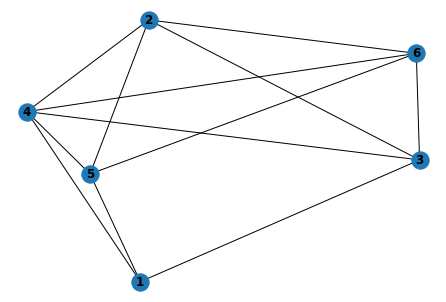

nodes with atleast 2 shortest paths between them are : ('1', '2')
nodes with atleast 2 shortest paths between them are : ('1', '6')
nodes with atleast 2 shortest paths between them are : ('3', '5')


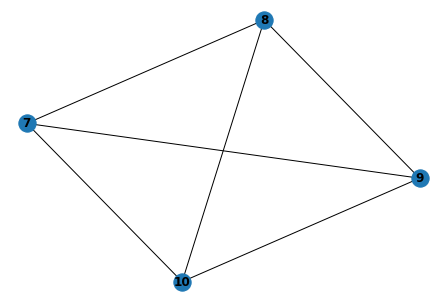

In [126]:
# with toy graph as input, results are :
get_part4b(toy_graph,True,False)

In [127]:
# with 3 random networks as input, results are :
R1 = nx.fast_gnp_random_graph(50, 0.1, seed=None, directed=False)
R2 = nx.fast_gnp_random_graph(50, 0.2, seed=None, directed=False)
R3 = nx.fast_gnp_random_graph(50, 0.8, seed=None, directed=False)

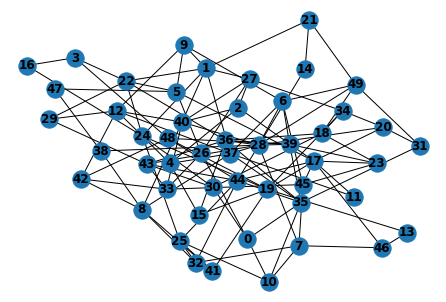

the number of pairs of nodes for which there are at least two shortest paths between them in G are: 1104


In [130]:
nx.draw(R1, with_labels=True, font_weight='bold')
plt.show()
get_part4b(R1,False,False)

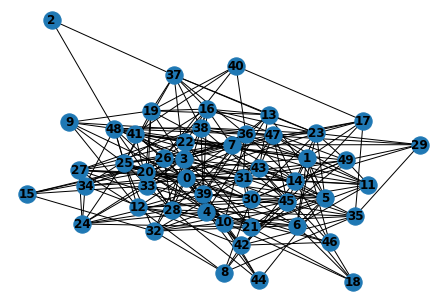

the number of pairs of nodes for which there are at least two shortest paths between them in G are: 977


In [131]:
nx.draw(R2, with_labels=True, font_weight='bold')
plt.show()
get_part4b(R2,False,False)

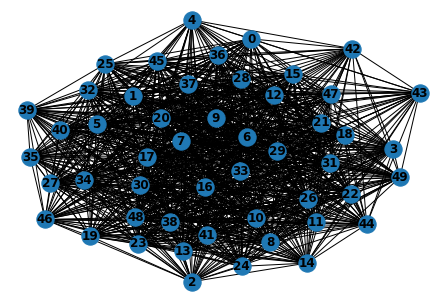

the number of pairs of nodes for which there are at least two shortest paths between them in G are: 260


In [132]:
nx.draw(R3, with_labels=True, font_weight='bold')
plt.show()
get_part4b(R3,False,False)

In [158]:
# with ppi as input, results are :
get_part4b(ppi,False,True)

the number of pairs of nodes for which there are at least two shortest paths between them in G are: 584815
